In [60]:
import seaborn
import matplotlib.pyplot as plt
import math
import os
import numpy
import pyBigWig
from scipy import stats

#seaborn.set(rc={'figure.figsize':(5,5)})

In [87]:
bw = {'early': {1: {}, 2: {}}, 'late': {1: {}, 2: {}}}
bw['early'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S3-5h_plus_rpkm.bw")
bw['early'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S4-5h_plus_rpkm.bw")
bw['late'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S5-16h_plus_rpkm.bw")
bw['late'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S6-16h_plus_rpkm.bw")
bw['early'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S3-5h_minus_rpkm.bw")
bw['early'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S4-5h_minus_rpkm.bw")
bw['late'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S5-16h_minus_rpkm.bw")
bw['late'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S6-16h_minus_rpkm.bw")

In [88]:
def get_corr(bw1, bw2, window=100, toplot=True):
    chrom_d = bw1.chroms()
    chrom = list(chrom_d.keys())[0]
    chrom_size = chrom_d[chrom]

    values1, values2 = [], []
    for i in range(int(chrom_size/window)):
        mean1 = bw1.stats(chrom, i*window, (i+1)*window, "mean")[0]
        mean2 = bw2.stats(chrom, i*window, (i+1)*window, "mean")[0]
        values1.append(mean1)
        values2.append(mean2)
    
    if toplot:
        plt.plot(values1, values2, 'o', color='black', alpha=0.1)
        plt.xscale('log')
        plt.yscale('log')
        
    return stats.pearsonr(values1, values2)

(0.9913398748247066, 0.0)

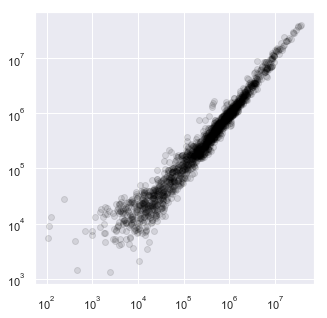

In [89]:
get_corr(bw['early'][1]['plus'], bw['early'][2]['plus'])

(0.9912063582514021, 0.0)

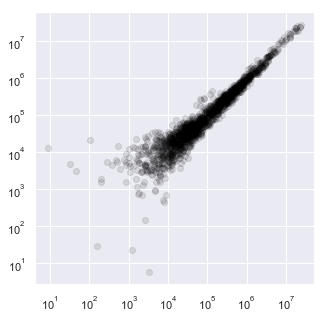

In [90]:
get_corr(bw['early'][1]['minus'], bw['early'][2]['minus'])

(0.8197596153086267, 0.0)

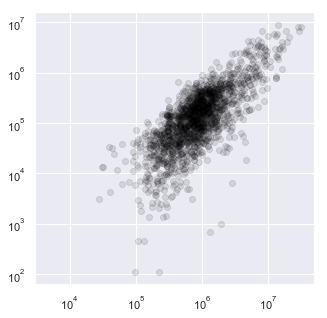

In [91]:
get_corr(bw['late'][1]['plus'], bw['late'][2]['plus'])

(0.7368404419826746, 3.7274553162629755e-291)

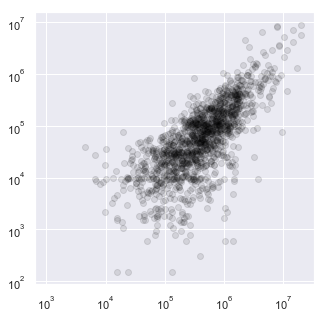

In [92]:
get_corr(bw['late'][1]['minus'], bw['late'][2]['minus'])